In [3]:
import pandas as pd
df = pd.read_csv('Amazon0302.txt',sep='\t')
df

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
1234872,262110,262099
1234873,262110,262100
1234874,262110,262101
1234875,262110,262106


In [4]:
df1 = df.head(50)
nodes = df1.to_numpy()
print(nodes)
se = df1.groupby('FromNodeId').count()
se1 = df1.groupby('ToNodeId').count()
print(se1)
edge = df1['FromNodeId'].count()
vertex = df1['ToNodeId'].max()+1
print("edge",edge)
print("vertex",vertex)
#s = set(arr)
#print(s.size())

[[  0   1]
 [  0   2]
 [  0   3]
 [  0   4]
 [  0   5]
 [  1   0]
 [  1   2]
 [  1   4]
 [  1   5]
 [  1  15]
 [  2   0]
 [  2  11]
 [  2  12]
 [  2  13]
 [  2  14]
 [  3  63]
 [  3  64]
 [  3  65]
 [  3  66]
 [  3  67]
 [  4   7]
 [  4  16]
 [  4  17]
 [  4  18]
 [  4  19]
 [  5   6]
 [  5   7]
 [  5   8]
 [  5   9]
 [  5  10]
 [  6   5]
 [  6   7]
 [  6   8]
 [  6   9]
 [  6  20]
 [  7   5]
 [  7   8]
 [  7   9]
 [  7  30]
 [  7 290]
 [  8  13]
 [  8  21]
 [  8  22]
 [  8  23]
 [  8  24]
 [ 10   5]
 [ 10   7]
 [ 10 137]
 [ 10 138]
 [ 10 139]]
          FromNodeId
ToNodeId            
0                  2
1                  1
2                  2
3                  1
4                  2
5                  5
6                  1
7                  4
8                  3
9                  3
10                 1
11                 1
12                 1
13                 2
14                 1
15                 1
16                 1
17                 1
18                 1
19      

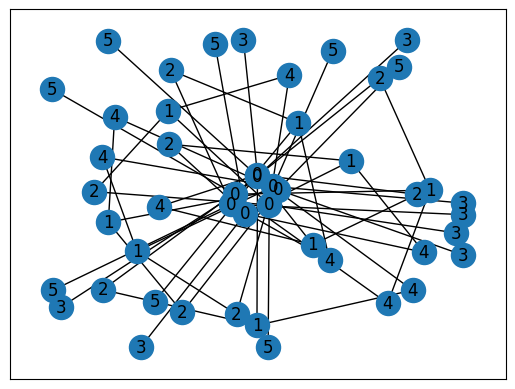

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
   
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        for i in self.visual:
            G = nx.Graph()
            G.add_edges_from(self.visual)
            nx.draw_networkx(G)
            if i == self.visual:
                plt.show()
  
# Driver code
G = GraphVisualization()
for i in range(8):
    G.addEdge(nodes[i][0],nodes[i][1])
G.visualize()

In [6]:


from collections import defaultdict

#This class represents a directed graph using adjacency list representation
class Graph:

	def __init__(self,vertices,pid):
		self.V= vertices #No. of vertices
		self.graph = defaultdict(list) # default dictionary to store graph
		self.scc = defaultdict(list)
		self.pid = pid
		#self.prod = []
		#self.Scccount = 0

	# function to add an edge to graph
	def addEdge(self,u,v):
		self.graph[u].append(v)

	# A function used by DFS
	def DFSUtil(self,v,visited):
		# Mark the current node as visited and print it
		visited[v]= True
		#print (v),
		#Scccount+=1
		
		#Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i]==False:
				self.DFSUtil(i,visited)
				self.scc[v].append(i)
				#print(v == self.pid)
		if v == self.pid:
			self.printabc(v)
				#print(self.scc[v])
					#self.product = self.scc[v]

		#print(self.scc[v])


	def fillOrder(self,v,visited, stack):
		# Mark the current node as visited
		visited[v]= True
		#Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i]==False:
				self.fillOrder(i, visited, stack)
		stack = stack.append(v)
	

	# Function that returns reverse (or transpose) of this graph
	def getTranspose(self):
		g = Graph(self.V,self.pid)

		# Recur for all the vertices adjacent to this vertex
		for i in self.graph:
			for j in self.graph[i]:
				g.addEdge(j,i)
		return g

	def printabc(self,v):
		print(self.scc[v])

	# The main function that finds and prints all strongly
	# connected components
	def printSCCs(self):
		
		stack = []
		# Mark all the vertices as not visited (For first DFS)
		visited =[False]*(self.V)
		# Fill vertices in stack according to their finishing
		# times
		for i in range(self.V):
			if visited[i]==False:
				self.fillOrder(i, visited, stack)

		# Create a reversed graph
		gr = self.getTranspose()
		
		# Mark all the vertices as not visited (For second DFS)
		visited =[False]*(self.V)

		# Now process all vertices in order defined by Stack
		while stack:
			i = stack.pop()
			if visited[i]==False:
				gr.DFSUtil(i, visited)
				#self.nullLoop()
				#print("")
		#print("asd",self.scc[5])

s = int(input("enter a product number : "))

g = Graph(vertex,s)  
for i in range(edge):  
    g.addEdge(nodes[i][0],nodes[i][1])


print ("Following are product id's that can be brought together(strongly connected components) " +
						"in given graph")
g.printSCCs()

#print(g.scc[5])



Following are product id's that can be brought together(strongly connected components) in given graph
[5]


In [7]:
def insertionSort(array):

    for step in range(1, len(array)):
        key = array[step]
        j = step - 1
            
        while j >= 0 and key < array[j]:
            array[j + 1] = array[j]
            j = j - 1
        
        array[j + 1] = key


data = [9, 5, 1, 4, 3]
insertionSort(data)
print('Sorted Array in Ascending Order:')
print(data)

Sorted Array in Ascending Order:
[1, 3, 4, 5, 9]
